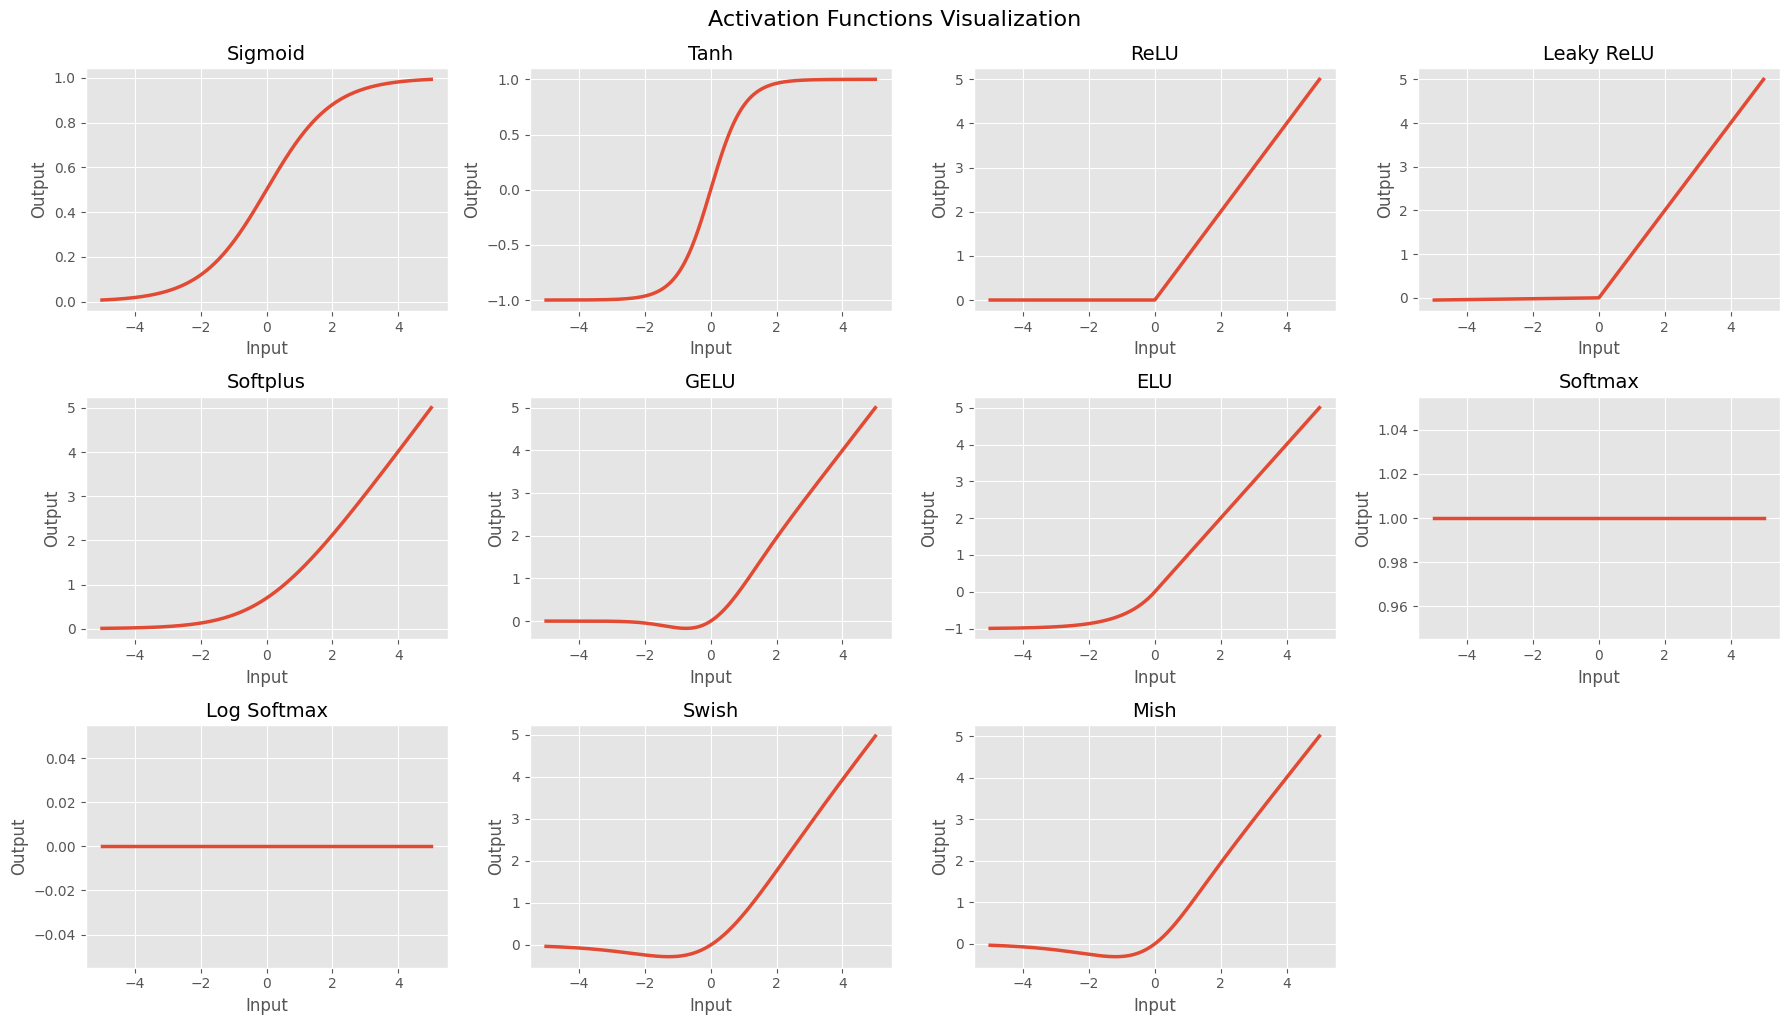


在 x = 0.01 处，各激活函数的输出值为：

Sigmoid:        0.5024999976158142
Tanh:           0.00999966636300087
ReLU:           0.009999999776482582
Leaky ReLU:     0.009999999776482582
Softplus:       0.6981596946716309
GELU:           0.005039893090724945
ELU:            0.009999999776482582
Softmax:        1.0
Log Softmax:    0.0
Swish:          0.005024999845772982
Mish:           0.006031983532011509


In [4]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F


# 自定义激活函数
def swish(x):
    return x * F.sigmoid(x)

def mish(x):
    return x * torch.tanh(F.softplus(x))

# 所有要可视化的激活函数
activations = {
    'Sigmoid': F.sigmoid,
    'Tanh': torch.tanh,
    'ReLU': F.relu,
    'Leaky ReLU': F.leaky_relu,
    'Softplus': F.softplus,
    'GELU': F.gelu,
    'ELU': F.elu,
    'Softmax': lambda x: F.softmax(x.unsqueeze(0), dim=0).squeeze(),  # 模拟单维 softmax
    'Log Softmax': lambda x: F.log_softmax(x.unsqueeze(0), dim=0).squeeze(),
    'Swish': swish,
    'Mish': mish,
}

# 输入范围
x = torch.linspace(-5, 5, 1000)
x.requires_grad_(False)


# ================================
# 📈 可视化激活函数曲线
# ================================
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
axes = axes.flatten()

for ax, (name, func) in zip(axes, activations.items()):
    with torch.no_grad():
        y = func(x)
    
    ax.plot(x.numpy(), y.numpy(), linewidth=2.5)
    ax.set_title(name, fontsize=14)
    ax.set_xlabel("Input")
    ax.set_ylabel("Output")
    ax.grid(True)

# 隐藏多余的子图
for i in range(len(activations), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.suptitle("Activation Functions Visualization", fontsize=16, y=1.02)
plt.show()


# ================================
# 🔍 输入 x 值，输出每个函数对应的 y 值
# ================================
def evaluate_activations(x_val):
    x_tensor = torch.tensor([x_val], dtype=torch.float32)
    results = {}
    for name, func in activations.items():
        try:
            with torch.no_grad():
                result = func(x_tensor).item()
        except Exception as e:
            result = f"Error: {str(e)}"
        results[name] = result
    return results

# 示例使用
x_input = float(input("请输入一个数值 x："))
outputs = evaluate_activations(x_input)

print(f"\n在 x = {x_input} 处，各激活函数的输出值为：\n")
for name, value in outputs.items():
    print(f"{name+':':<15} {value}")

In [11]:
cu = 0.001
mid = -0.0005

# 防止除以零，使用绝对值归一化
growth_percentage = ((cu - mid) / abs(mid + 1e-10)) * 100

print(f"\ncu 相对于 mid 的增长百分比：{growth_percentage:.2f}%\n")


cu 相对于 mid 的增长百分比：300.00%

